In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('Wholesale customers data.csv')

In [ ]:
data.shape #mostrar filas y columnas

(440, 8)

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data.isnull().sum() #Conocer la existencia de datos nulos

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
data.dtypes #Conociendo los formatos de los datos

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [ ]:
#Seleccionar algunos (cualquiera) datos de muestra, elegidas al azar
indices = [26,176,392]

In [ ]:
#Usando la instruccion loc, seleccionamos los datos de muestra de la data y almacenar en una variable(muestras)
#El parametro: columns=data.keys()) nos permite incluir en la variable muestras el nombre de cada una de las columnas,
#.reset_index(drop=True) --> Reiniciar el index
muestras=pd.DataFrame(data.loc[indices],columns=data.keys()).reset_index(drop=True)


In [ ]:
#Se eliminan indices de nuestra data(original) para que el modelo no se entrene con esta informacion
data=data.drop(indices,axis=0)

In [ ]:
muestras.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,9898,961,2861,3151,242,833
1,1,3,45640,6958,6536,7368,1532,230
2,1,3,518,4180,3600,659,122,654


In [ ]:
data=data.drop(['Region','Channel'],axis=1)
muestras=muestras.drop(['Region','Channel'],axis=1)

In [ ]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
# Para que python pueda procesar los datos, se debe realizar el escalamiento:
# transformamos los datos para que se ajusten a una escala especifica. 0-1
from sklearn import preprocessing
data_escalada=preprocessing.Normalizer().fit_transform(data)
muestras_escaladas=preprocessing.Normalizer().fit_transform(muestras)


In [ ]:
print(data_escalada) #todos los datos son float

[[0.70833271 0.53987376 0.42274083 0.01196489 0.14950522 0.07480852]
 [0.44219826 0.61470384 0.59953989 0.11040858 0.20634248 0.11128583]
 [0.39655169 0.5497918  0.47963217 0.15011913 0.2194673  0.48961931]
 ...
 [0.36446153 0.38846468 0.7585445  0.01096068 0.37223685 0.04682745]
 [0.93773743 0.1805304  0.20340427 0.09459392 0.01531    0.19365326]
 [0.67229603 0.40960124 0.60547651 0.01567967 0.11506466 0.01254374]]


In [ ]:
from sklearn.cluster import KMeans
X=data_escalada.copy()

<function matplotlib.pyplot.show>

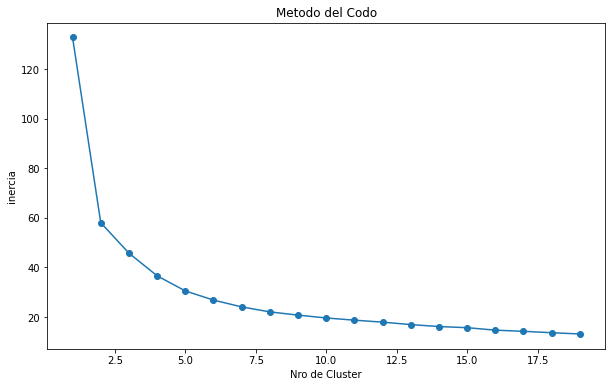

In [ ]:
# Hallar el valor optimo de k, para esto se necesita generar un grafico con el metodo de codo
inercia=[] #Definiendo el vector inercia que sera utilizado para el grafico de codo
for i in range (1,20):
  algoritmo=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)# n_init es el numero de veces que el algoritmo se ejecutara con diferentes centroides
  algoritmo.fit(X)
  inercia.append(algoritmo.inertia_) # llenar el vector inercia
plt.figure(figsize=[10,6])
plt.title('Metodo del Codo')
plt.xlabel('Nro de Cluster')
plt.ylabel('inercia')
plt.plot(list(range(1,20)),inercia,marker='o')# el caracter 'o' es la marca(circulo)
plt.show
# En el grafico de codo se observa el cambio de pendiente de empinada a poca profundidad:
# esto significa que el codo se muestra entre los valores 5 o 6, en nuestro caso optamos
# por el valor 6 , ya que hace referencia al numero de columnas de nuestra data

In [ ]:
algoritmo=KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10)


In [ ]:
algoritmo.fit(X) #Entrenando el algoritmo

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Se debe obtener los datos de los centroides y las etiquetas. Esta informacion es util para
# realizar nuestro grafico final
centroides=algoritmo.cluster_centers_
etiquetas=algoritmo.labels_

In [ ]:
# antes de realizar la grafica final, utilizamos los datos de muestra escaladas para
# determinar a que cluster pertenece
muestra_prediccion=algoritmo.predict(muestras_escaladas)
for i,pred in enumerate(muestra_prediccion):
  print("Muestra",i,"se encuentra en el cluster:", pred)

Muestra 0 se encuentra en el cluster: 0
Muestra 1 se encuentra en el cluster: 0
Muestra 2 se encuentra en el cluster: 5


<function matplotlib.pyplot.show>

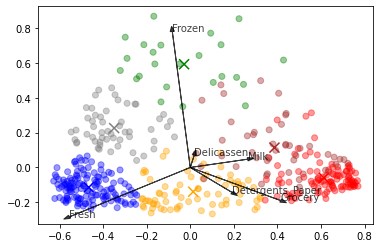

In [ ]:
from sklearn.decomposition import PCA
# PCA(analisis de componentes principales) es una tecnica para reducir el numero de 
# variables de un conjunto de datos
modelo_pca=PCA(n_components=2) # Reducir el nro de variables de 6 a 2
modelo_pca.fit(X)
# el metodo transform trata de que los datos se comporten normalmente, por ejm: si
# se tiene dos variables y miden las distancias, pero tienen las unidades como centimetros y
# en kilometros, para comparar estas dos, tienen que convertirse a las mismas unidades
pca=modelo_pca.transform(X) # iniciando la Transformacion
centroides_pca=modelo_pca.transform(centroides) #Aplicando la reduccion de dimensionalidad a los centroides
colores=['blue','red','green','orange','gray','brown']
colores_cluster=[colores[etiquetas[i]] for i in range(len(pca))]
plt.scatter(pca[:,0],pca[:,1],c=colores_cluster, marker='o', alpha=0.4)
plt.scatter(centroides_pca[:,0],centroides_pca[:,1], marker='x', s=100, linewidths=3, c=colores)
xvector=modelo_pca.components_[0]*max(pca[:,0])
yvector=modelo_pca.components_[1]*max(pca[:,1])
columnas=data.columns
for i in range(len(columnas)):
  plt.arrow(0,0,xvector[i],yvector[i],color='black',width=0.0005,head_width=0.02,alpha=0.75)
  plt.text(xvector[i],yvector[i],list(columnas)[i],color='black',alpha=0.75)
plt.show